# Project: Investigate FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

* ### The data comes from the FBI's National Instant Criminal Background Check System (NICS) which is used to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. It contains two datasets to be analyzed:
    * #### NICS data: the number of firearm checks by month, state, and type
    * #### US census data: supplemental, at state level
* ### Questions to ask while exploring the data:
    * #### Question 1: Which states have the highest growth in gun registrations?
    * #### Question 2: Which census data is most associated with high gun per capita?
    * #### Question 3: What is the overall trend of gun purchase?

In [1]:
# import libraries and read data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_nics = pd.read_excel('./ncis-and-census-data/gun_data.xlsx',parse_dates=[0])
df_census = pd.read_csv('./ncis-and-census-data/us_census_data.csv',nrows=64,index_col=0,thousands=',')

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [2]:
pd.set_option('display.max_columns',None)
df_nics.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,2.0,1378.0,1262.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,0.0,200.0,154.0,2.0,28.0,30.0,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,0.0,1474.0,748.0,3.0,82.0,5.0,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,0.0,1296.0,1824.0,4.0,0.0,0.0,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,535.0,397.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [3]:
df_nics.shape

(12485, 27)

In [4]:
# Explore missing values in each column
df_nics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12461 non-null  float64       
 3   permit_recheck             1100 non-null   float64       
 4   handgun                    12465 non-null  float64       
 5   long_gun                   12466 non-null  float64       
 6   other                      5500 non-null   float64       
 7   multiple                   12485 non-null  int64         
 8   admin                      12462 non-null  float64       
 9   prepawn_handgun            10542 non-null  float64       
 10  prepawn_long_gun           10540 non-null  float64       
 11  prepawn_other              5115 non-null   float64       
 12  rede

In [5]:
df_census.head(1)

,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Fact,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371","1,428,557","1,683,140","12,801,539","6,633,053","3,134,693","2,907,289","4,436,974","4,681,666","1,331,479","6,016,447","6,811,779","9,928,300","5,519,952","2,988,726","6,093,000","1,042,520","1,907,116","2,940,058","1,334,795","8,944,469",2081015.0,19745289.0,10146788.0,757952.0,11614373.0,3923561.0,4093465.0,12784227.0,1056426.0,4961119.0,865454.0,6651194.0,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"


In [6]:
df_census.shape

(64, 51)

In [7]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, Population estimates, July 1, 2016,  (V2016) to Land area in square miles, 2010
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fact Note       16 non-null     object 
 1   Alabama         64 non-null     object 
 2   Alaska          64 non-null     object 
 3   Arizona         64 non-null     object 
 4   Arkansas        64 non-null     object 
 5   California      64 non-null     object 
 6   Colorado        64 non-null     object 
 7   Connecticut     64 non-null     object 
 8   Delaware        64 non-null     object 
 9   Florida         64 non-null     object 
 10  Georgia         64 non-null     object 
 11  Hawaii          64 non-null     object 
 12  Idaho           64 non-null     object 
 13  Illinois        64 non-null     object 
 14  Indiana         64 non-null     object 
 15  Iowa            64 non-null     object 
 16  Kansas         

In [8]:
df_census.Alabama.value_counts()

98,540        1
1,634,391     1
22.60%        1
85.30%        1
58,564,965    1
             ..
69.30%        1
4,780,131     1
24.4          1
4,779,736     1
$717          1
Name: Alabama, Length: 64, dtype: int64

### Data Cleaning (Fill missing values, drop duplicates, extract useful columns)
#### Gun Data Cleaning

In [9]:
# fill NA values with zeros since the missing values are the one with no record of trading guns
df_nics.fillna(0,inplace=True)
# check if there is any missing value
df_nics.isnull().any().any()

False

In [10]:
# Explore statistics of gun_data
df_nics.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000
mean,6401.300441,102.727433,5931.364277,7798.960833,158.798078,268.603364,58.789588,4.076652,6.613696,0.067841,344.577333,506.156268,0.743692,5.218102,1.298438,0.149379,0.006087,0.005767,3.289868,2.555707,0.226912,0.079696,0.097317,0.019143,21595.725911
std,23731.158830,2756.731662,8614.954626,9307.740581,913.339655,783.185073,604.262697,10.174706,15.395329,0.681467,735.036825,901.549269,3.061003,36.194758,9.590870,1.710795,0.179790,0.173912,33.987054,25.908792,2.139596,0.663611,0.740136,0.186114,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,857.000000,2063.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,511.000000,0.000000,3046.000000,5114.000000,0.000000,125.000000,0.000000,0.000000,0.000000,0.000000,2.000000,83.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4257.000000,0.000000,7277.000000,10374.000000,89.000000,301.000000,0.000000,3.000000,6.000000,0.000000,421.000000,670.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,10046.000000,8831.000000,79.000000,603.000000,168.000000,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [11]:
# 1) only focused on trading guns, so drop rental guns; 2) drop private sale guns; 3) drop prepawn guns
to_drop = pd.Index([])
for s in ['prepawn_','return','rentals_','private_']:
    col_temp = df_nics.columns[df_nics.columns.str.contains(s)]
    to_drop = to_drop.union(col_temp)
df_nics.drop(columns=to_drop.union(['permit_recheck']),inplace=True)

In [12]:
# sum up all sold guns
df_nics['sale'] = df_nics.loc[:,'handgun':'redemption_other'].sum(axis=1)
# separate registered year and month
df_nics.rename(columns={'month':'Month'},inplace=True)
df_nics['year'] = df_nics['Month'].map(lambda x: x.year)
df_nics['month'] = df_nics['Month'].map(lambda x: x.month)
df_nics.head()

,Month,state,permit,handgun,long_gun,other,multiple,admin,redemption_handgun,redemption_long_gun,redemption_other,totals,sale,year,month
0,2017-09-01,Alabama,16717.0,5734.0,6320.0,221.0,317,0.0,1378.0,1262.0,1.0,32019,15233.0,2017,9
1,2017-09-01,Alaska,209.0,2320.0,2930.0,219.0,160,0.0,200.0,154.0,2.0,6303,5985.0,2017,9
2,2017-09-01,Arizona,5069.0,11063.0,7946.0,920.0,631,0.0,1474.0,748.0,3.0,28394,22785.0,2017,9
3,2017-09-01,Arkansas,2935.0,4347.0,6063.0,165.0,366,51.0,1296.0,1824.0,4.0,17747,14116.0,2017,9
4,2017-09-01,California,57839.0,37165.0,24581.0,2984.0,0,0.0,535.0,397.0,5.0,123506,65667.0,2017,9


#### US Census Data Cleaning

In [13]:
# drop the fact note column
df_census.drop(columns=['Fact Note'],inplace=True)
df_census.head(1)

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Fact,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371","1,428,557","1,683,140","12,801,539","6,633,053","3,134,693","2,907,289","4,436,974","4,681,666","1,331,479","6,016,447","6,811,779","9,928,300","5,519,952","2,988,726","6,093,000","1,042,520","1,907,116","2,940,058","1,334,795","8,944,469",2081015.0,19745289.0,10146788.0,757952.0,11614373.0,3923561.0,4093465.0,12784227.0,1056426.0,4961119.0,865454.0,6651194.0,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"


In [14]:
# get rid of symbols in numbers
df_census = df_census.applymap(lambda x: str(x).replace(',',''))
df_census = df_census.applymap(lambda x: str(x).replace('$',''))
mask_percent = df_census.applymap(lambda x: '%' in str(x))
df_census[mask_percent] = df_census[mask_percent].applymap(lambda x: float(str(x).strip('%'))/100)
df_census = df_census.apply(lambda x: pd.to_numeric(x,errors='coerce'))
df_census.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Fact,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Population estimates, July 1, 2016, (V2016)",4863300.000,741894.000,6931071.000,2988248.000,3.925002e+07,5540545.000,3576452.000,952065.000,2.061244e+07,1.031037e+07,1428557.000,1683140.000,1.280154e+07,6633053.000,3134693.000,2907289.000,4436974.000,4681666.000,1331479.000,6016447.000,6811779.000,9928300.000,5519952.000,2988726.000,6093000.000,1042520.000,1907116.000,2940058.000,1334795.000,8944469.000,2081015.000,1.974529e+07,1.014679e+07,757952.000,1.161437e+07,3923561.000,4093465.000,1.278423e+07,1056426.000,4961119.000,865454.000,6651194.000,2.786260e+07,3051217.000,624594.000,8411808.000,7288000.000,1831102.000,5778708.000,585501.000
"Population estimates base, April 1, 2010, (V2016)",4780131.000,710249.000,6392301.000,2916025.000,3.725452e+07,5029324.000,3574114.000,897936.000,1.880459e+07,9.688680e+06,1360301.000,1567650.000,1.283157e+07,6484136.000,3046869.000,2853129.000,4339344.000,4533479.000,1328364.000,5773786.000,6547813.000,9884129.000,5303924.000,2968103.000,5988928.000,989414.000,1826334.000,2700691.000,1316461.000,8791953.000,2059198.000,1.937811e+07,9.535688e+06,672591.000,1.153673e+07,3751615.000,3831072.000,1.270286e+07,1052940.000,4625410.000,814195.000,6346298.000,2.514610e+07,2763888.000,625741.000,8001041.000,6724545.000,1853011.000,5687289.000,563767.000
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",0.017,0.045,0.084,0.025,5.400000e-02,0.102,0.001,0.060,9.600000e-02,6.400000e-02,0.050,0.074,-2.000000e-03,0.023,0.029,0.019,0.022,0.033,0.002,0.042,0.040,0.004,0.041,0.007,0.017,0.054,0.044,0.089,0.014,0.017,0.011,1.900000e-02,6.400000e-02,0.127,7.000000e-03,0.046,0.068,6.000000e-03,0.003,0.073,0.063,0.048,1.080000e-01,0.104,-0.002,0.051,0.084,-0.012,0.016,0.039
"Population, Census, April 1, 2010",4779736.000,710231.000,6392017.000,2915918.000,3.725396e+07,5029196.000,3574097.000,897934.000,1.880131e+07,9.687653e+06,1360301.000,1567582.000,1.283063e+07,6483802.000,3046355.000,2853118.000,4339367.000,4533372.000,1328361.000,5773552.000,6547629.000,9883640.000,5303925.000,2967297.000,5988927.000,989415.000,1826341.000,2700551.000,1316470.000,8791894.000,2059179.000,1.937810e+07,9.535483e+06,672591.000,1.153650e+07,3751351.000,3831074.000,1.270238e+07,1052567.000,4625364.000,814180.000,6346105.000,2.514556e+07,2763885.000,625741.000,8001024.000,6724540.000,1852994.000,5686986.000,563626.000
"Persons under 5 years, percent, July 1, 2016, (V2016)",0.060,0.073,0.063,0.064,6.300000e-02,0.061,0.052,0.058,5.500000e-02,6.400000e-02,0.064,0.068,6.000000e-02,0.064,0.064,0.067,0.062,0.066,0.049,0.061,0.053,0.058,0.064,0.063,0.061,0.060,0.070,0.063,0.048,0.058,0.062,5.900000e-02,6.000000e-02,0.073,6.000000e-02,0.068,0.058,5.600000e-02,0.052,0.059,0.071,0.061,7.200000e-02,0.083,0.049,0.061,0.062,0.055,0.058,0.065


<a id='eda'></a>
## Exploratory Data Analysis
### Question 1: Which states have the highest growth in gun registrations?

In [15]:
# group df_nics by state and estimate sum
df_nics_state = df_nics.groupby(["state"]).sum()
df_nics_state.drop(columns=['year','month'],inplace=True)
df_nics_state.head()

,permit,handgun,long_gun,other,multiple,admin,redemption_handgun,redemption_long_gun,redemption_other,totals,sale
state,,,,,,,,,,,
Alabama,1047441.0,2222037.0,2626029.0,39578.0,105230,32.0,304406.0,349070.0,416.0,6706079,5646798.0
Alaska,13352.0,434602.0,572174.0,15970.0,28904,19.0,31140.0,37454.0,88.0,1137643,1120351.0
Arizona,710509.0,1781468.0,1480762.0,56832.0,84979,6643.0,178430.0,113176.0,294.0,4425714,3702584.0
Arkansas,507951.0,965584.0,1663256.0,13053.0,61919,2146.0,150195.0,368693.0,173.0,3752633,3225019.0
California,6530543.0,5910880.0,5936770.0,342635.0,207864,16680.0,36864.0,31282.0,545.0,19014063,12483520.0


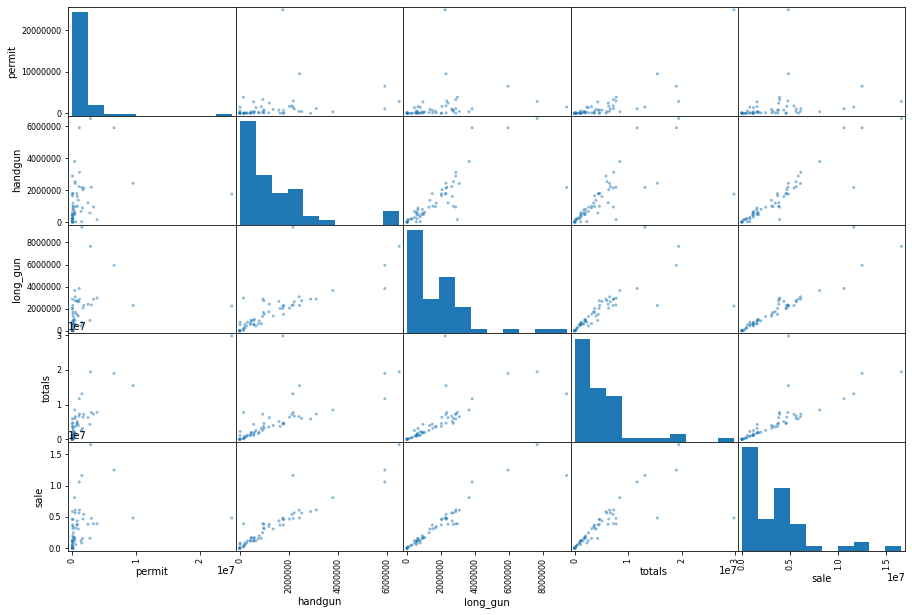

In [16]:
pd.plotting.scatter_matrix(df_nics_state.iloc[:,[0,1,2,9,10]],figsize=(15,10));

In [17]:
# find the state with most permit hold and 
print(df_nics_state.loc[df_nics_state['permit'].idxmax()])

permit                 24926779.0
handgun                 1753246.0
long_gun                2239863.0
other                     19869.0
multiple                 110439.0
admin                     36986.0
redemption_handgun       265343.0
redemption_long_gun      401048.0
redemption_other            261.0
totals                 29762434.0
sale                    4827055.0
Name: Kentucky, dtype: float64


permit                  2857582.0
handgun                 6493832.0
long_gun                7651396.0
other                    193465.0
multiple                 367962.0
admin                     25017.0
redemption_handgun       839409.0
redemption_long_gun      982571.0
redemption_other           2155.0
totals                 19435186.0
sale                   16555807.0
Name: Texas, dtype: float64


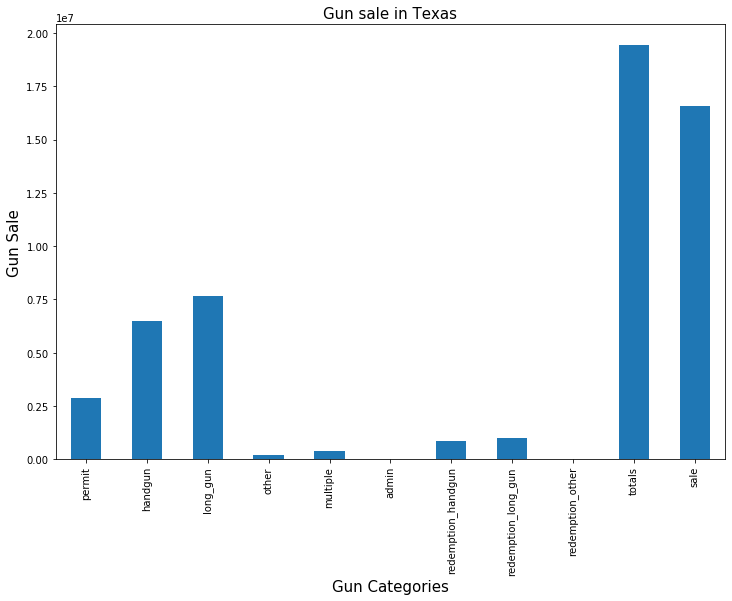

In [18]:
# find the state with maximum gun sale
print(df_nics_state.loc[df_nics_state['sale'].idxmax()])
# compare each category growth in bar chart
df_nics_state.loc[df_nics_state['sale'].idxmax()].plot(kind='bar',figsize=(12,8))
plt.title('Gun sale in Texas',size=15)
plt.xlabel('Gun Categories',size=15)
plt.ylabel('Gun Sale',size=15);

* ### The state that holds most permits is Kentucky, while the state that sold most guns over the years is Texas with Handgun and long gun contributing most.

### Question 2: Which census data is most associated with high gun per capita?

In [19]:
# transpose df_census so that the sate names are in index and facts all in columns
df_census = df_census.transpose()
df_census.index.name = 'state'
df_census.head(3)

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,4863300.0,4780131.0,0.017,4779736.0,0.060,0.064,0.226,0.237,0.161,0.138,0.516,0.515,0.693,0.268,0.007,0.014,0.001,0.016,0.042,0.658,363170.0,0.035,2230185.0,2171853.0,0.687,125500.0,1139.0,345.0,717.0,15001.0,1848325.0,2.55,0.853,0.052,0.843,0.235,0.118,0.107,0.580,0.530,7576462.0,26039632.0,124809759.0,57746565.0,58564965.0,12145.0,24.4,43623.0,24091.0,0.171,98540.0,1634391.0,67370353.0,0.019,322025.0,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,94.4,50645.33
Alaska,741894.0,710249.0,0.045,710231.0,0.073,0.076,0.252,0.264,0.104,0.077,0.477,0.480,0.661,0.038,0.152,0.063,0.013,0.073,0.070,0.612,69323.0,0.074,310658.0,306967.0,0.634,250000.0,1827.0,554.0,1146.0,1503.0,250969.0,2.81,0.809,0.162,0.921,0.2

In [20]:
# noly focused on data near 2016, so drop same categorical data in other years (2010, 2012)
mask_old = df_census.columns.str.contains('2010|2012')
df_census = df_census[df_census.columns[~mask_old]]
df_census.head(1)

Fact,"Population estimates, July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015"
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,4863300.0,0.06,0.226,0.161,0.516,0.693,0.268,0.007,0.014,0.001,0.016,0.042,0.658,363170.0,0.035,2230185.0,0.687,125500.0,1139.0,345.0,717.0,15001.0,1848325.0,2.55,0.853,0.052,0.843,0.235,0.118,0.107,0.58,0.53,24.4,43623.0,24091.0,0.171,98540.0,1634391.0,67370353.0,0.019,322025.0


In [21]:
# group df_nics by state and year
df_gun = df_nics[df_nics['year'].isin(np.arange(2012,2016))].groupby(['state']).sum()
# extract state and total gun hold from df_nics_state before 2016
df_gun = df_gun['totals'].reset_index()
# merge df_census with df_gun
df_tot = df_census.reset_index().merge(df_gun,on='state')
# estimate total gun per capita for each state
df_tot.totals = df_tot['totals']/df_tot.iloc[:,1]
df_tot.head(1)

,state,"Population estimates, July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015",totals
0,Alabama,4863300.0,0.06,0.226,0.161,0.516,0.693,0.268,0.007,0.014,0.001,0.016,0.042,0.658,363170.0,0.035,2230185.0,0.687,125500.0,1139.0,345.0,717.0,15001.0,1848325.0,2.55,0.853,0.052,0.843,0.235,0.118,0.107,0.58,0.53,24.4,43623.0,24091.0,0.171,98540.0,1634391.0,67370353.0,0.019,322025.0,0.484044


In [22]:
# used a reference for the index value of corresponding column name
pd.set_option('display.max_colwidth',-1)
df_tot.columns.to_frame().reset_index().iloc[:,0]

<ipython-input-22-3d6b5d11f414>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


0     state                                                                                 
1     Population estimates, July 1, 2016,  (V2016)                                          
2     Persons under 5 years, percent, July 1, 2016,  (V2016)                                
3     Persons under 18 years, percent, July 1, 2016,  (V2016)                               
4     Persons 65 years and over, percent,  July 1, 2016,  (V2016)                           
5     Female persons, percent,  July 1, 2016,  (V2016)                                      
6     White alone, percent, July 1, 2016,  (V2016)                                          
7     Black or African American alone, percent, July 1, 2016,  (V2016)                      
8     American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)              
9     Asian alone, percent, July 1, 2016,  (V2016)                                          
10    Native Hawaiian and Other Pacific Islander alone, percent, July 

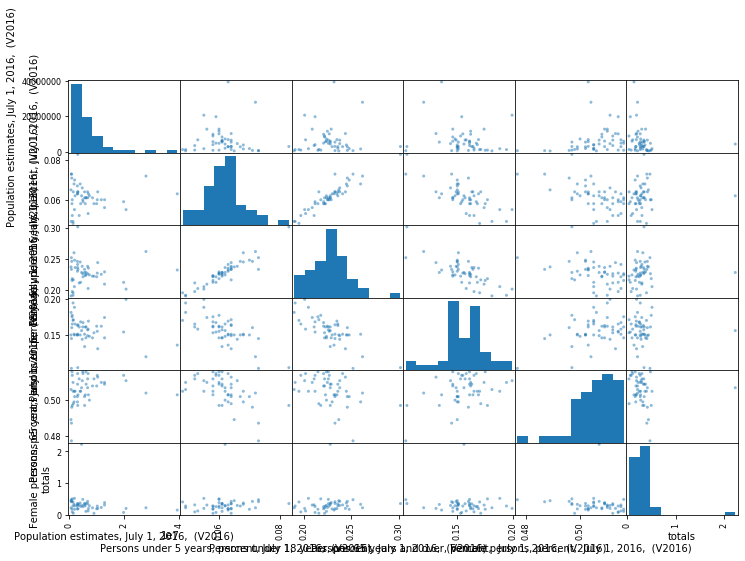

In [23]:
# the fact could be divided into several section, e.g., age&sex, race&originality, household income, education, employment etc.
# age & sex properties
df_age = df_tot.iloc[:,np.r_[:6,-1]]
# histgram of features, can observe relationship between totals and other features --> no sig correlation
pd.plotting.scatter_matrix(df_age.iloc[:,1:],figsize=(12,8));

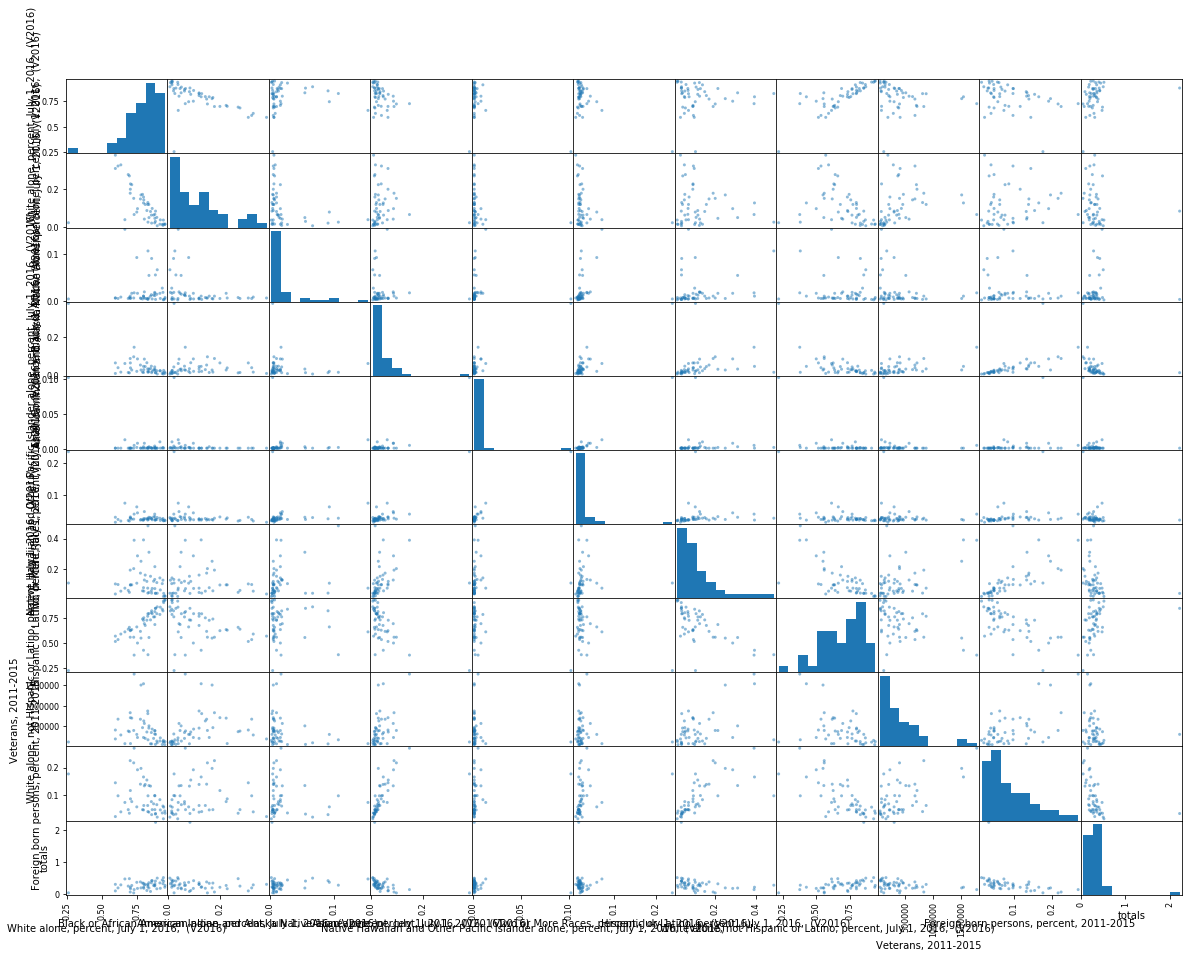

In [24]:
# race & originality properties
df_race = df_tot.iloc[:,np.r_[0,6:16,-1]]
# histgram of features, can observe relationship between totals and other features
pd.plotting.scatter_matrix(df_race.iloc[:,1:],figsize=(20,15));

In [25]:
# observe the last row of the matrix graph and found weak correlation for the last four columns (except totals)
df_race.columns[7:11]

Index(['Hispanic or Latino, percent, July 1, 2016,  (V2016)',
       'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)',
       'Veterans, 2011-2015', 'Foreign born persons, percent, 2011-2015'],
      dtype='object')

* #### 1. 'totals' reversely correlated to number of Hispanic/Latino, Veterans, and Foreign born person, but directly correlated to number of White. 

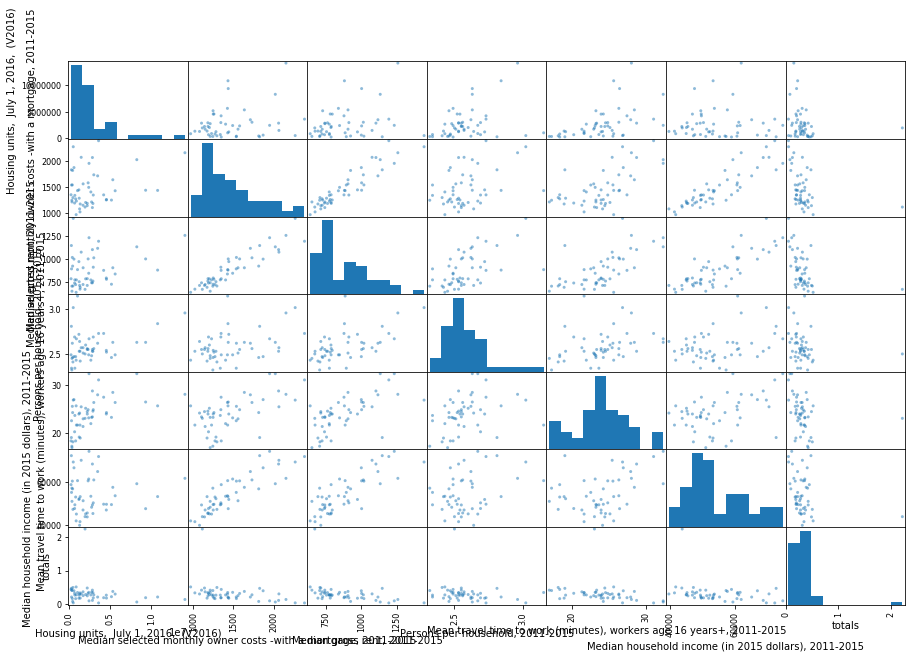

In [26]:
# household properties such as house owner/renter, person/house, household income, travel time to work
df_house = df_tot.iloc[:,np.r_[0,16,19,21,24,33,34,-1]]
# histgram of features, can observe relationship between totals and other features --> no sig correlation
pd.plotting.scatter_matrix(df_house.iloc[:,1:],figsize=(15,10));

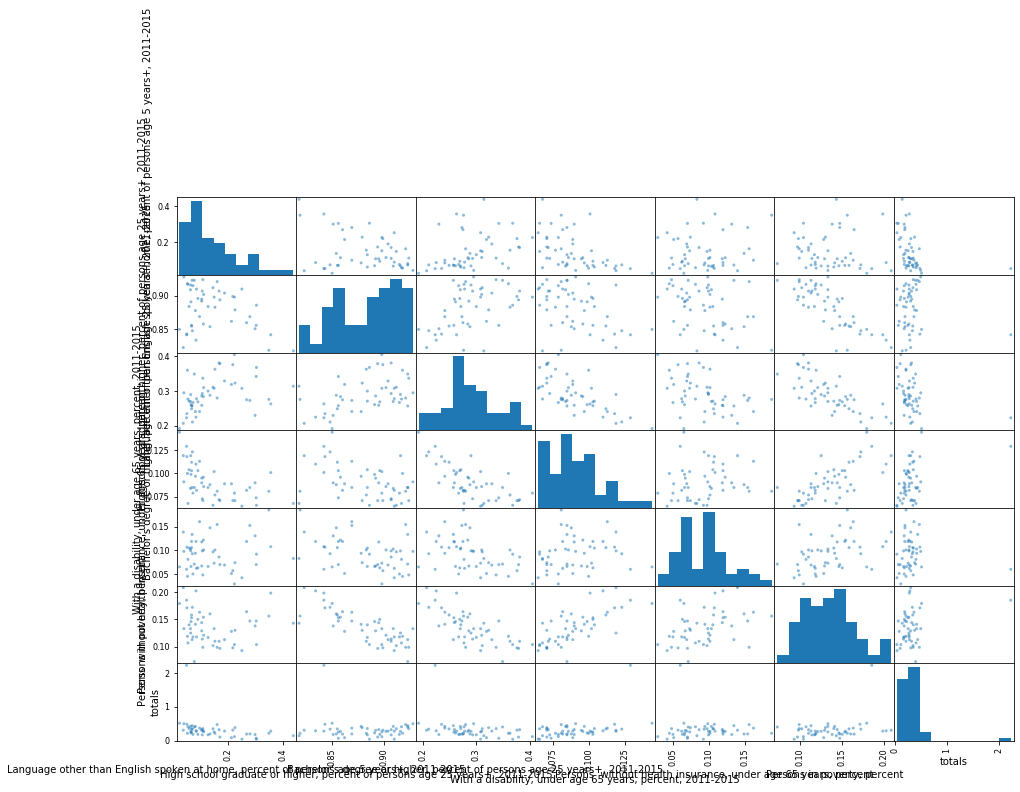

In [27]:
# education&warefare properties such as education, poverty, disability rate
df_edu = df_tot.iloc[:,np.r_[0,26:31,36,-1]]
# histgram of features, can observe relationship between totals and other features
pd.plotting.scatter_matrix(df_edu.iloc[:,1:],figsize=(15,10));

* #### 2. 'totals' reversely correlated to number of foreign language speaker and persons with Bachelor degree, but directly correlated to number of persons with disability. 

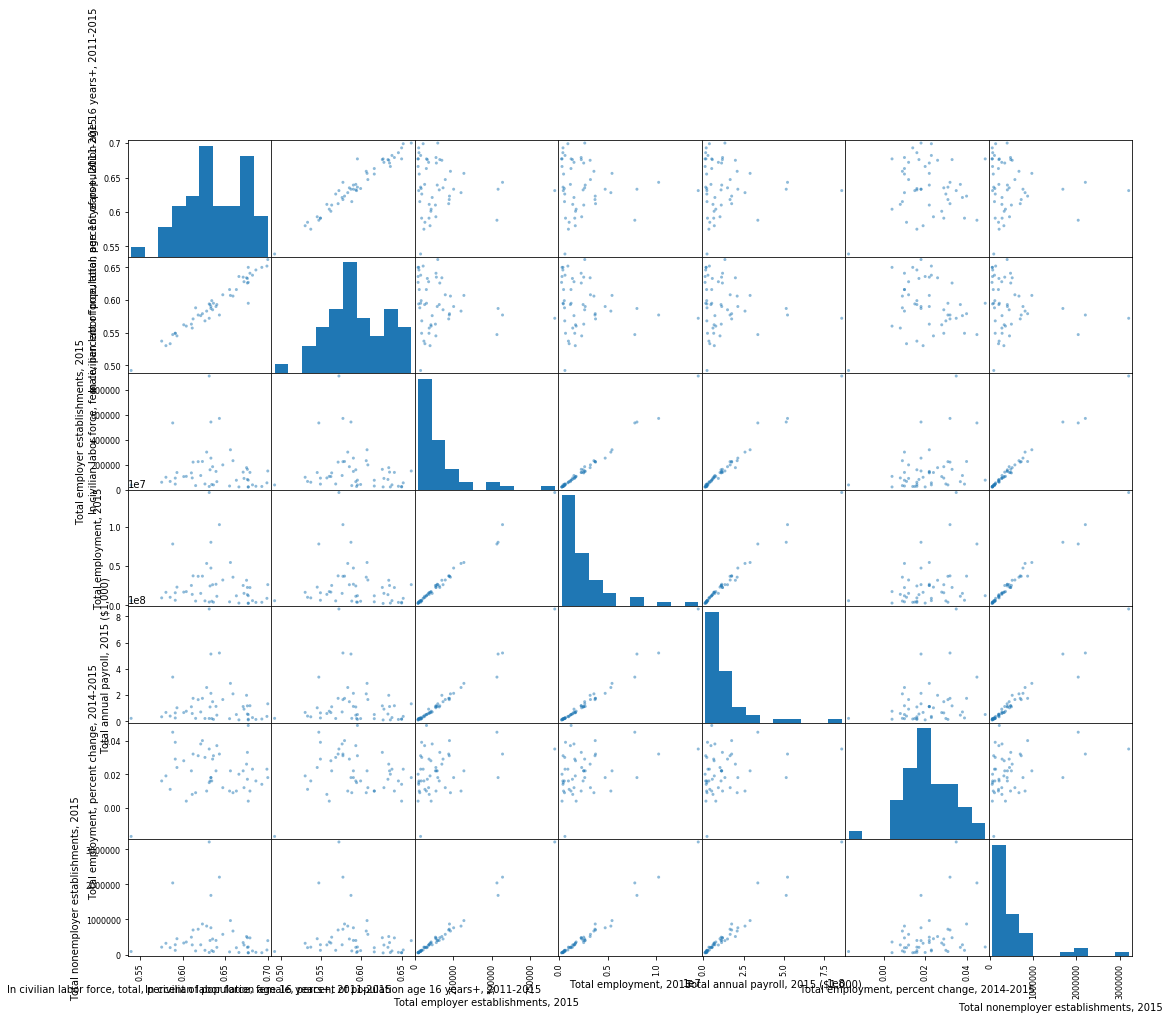

In [28]:
# employment properties such as labor force by gender, number of employers and employment
df_employ = df_tot.iloc[:,np.r_[0,31,32,37:42]]
# histgram of features, can observe relationship between totals and other features
pd.plotting.scatter_matrix(df_employ.iloc[:,1:],figsize=(18,15));

In [29]:
# observe the last row of the matrix graph and found strong correlation of totals to three columns
df_employ.columns[3:6]

Index(['Total employer establishments, 2015', 'Total employment, 2015',
       'Total annual payroll, 2015 ($1,000)'],
      dtype='object')

* #### 3. 'totals' strongly correlated to number of employment. 

* ### According to the analysis, it is found that the willingness of purchasing guns is weakly correlated to the education level, the race, the number of immigrants, and the disability rate but strongly correlated to the number of employment in a state. The more labor force get jobs, the more guns people tend to purchase in a state. 

### Question 3: What is the overall trend of gun purchase?

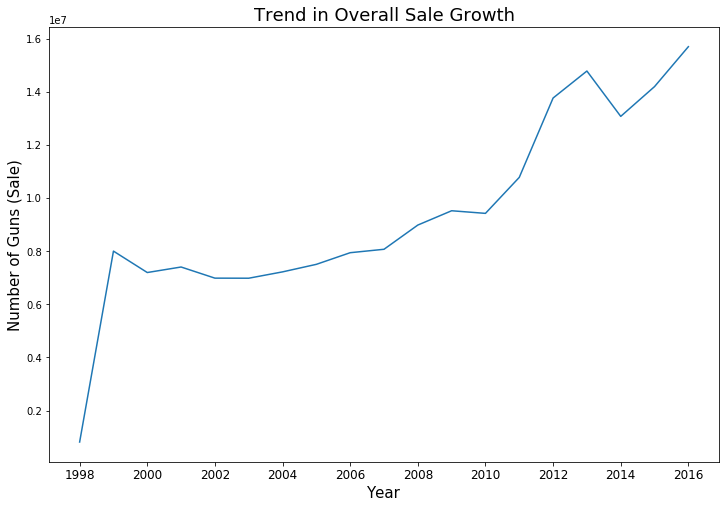

In [34]:
# plot overall trend from 1998-2016
df_nics.groupby(['year']).sum()['sale'][:-1].plot(figsize=(12,8))
plt.xlabel('Year',size=15)
plt.xticks(df_nics.groupby(['year']).sum()['sale'].index[:-1:2],size=12)
plt.ylabel('Number of Guns (Sale)',size=15)
plt.title('Trend in Overall Sale Growth',size=18);

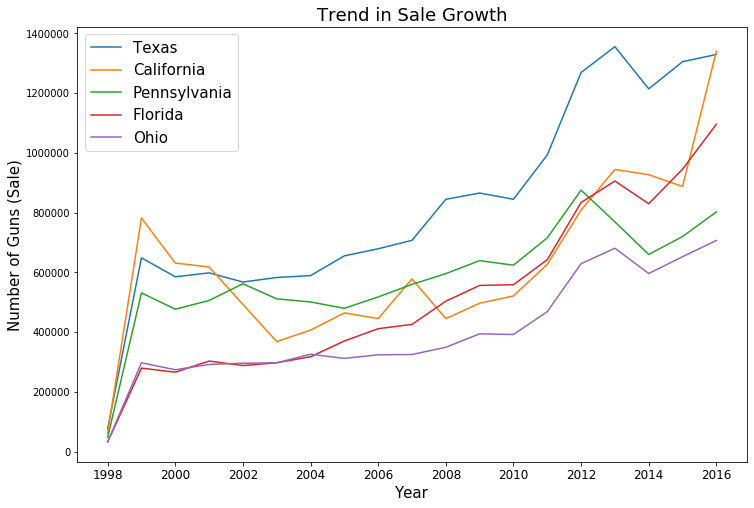

In [31]:
# write a function to draw line graphs of top several states with most gun sale/permit holds
def plot_trend(cat='sale',ncol=5):
    df_trend = df_nics.groupby(['state','year']).sum()[cat].unstack()\
                .merge(df_nics_state[cat],on='state').sort_values(by=cat,ascending=False)
    df_trend.T.iloc[:-2,:ncol].plot(figsize=(12,8))
    plt.xlabel('Year',size=15)
    plt.xticks(df_trend.columns[:-2:2].astype(int),size=12)
    plt.ylabel('Number of Guns ({})'.format(cat.capitalize()),size=15)
    plt.legend(fontsize=15)
    plt.title('Trend in {} Growth'.format(cat.capitalize()),size=18);
# default is top 5 states with most gun sale from 1998 to 2016
plot_trend()

* ### 1. From 1998 to 2016, the top 5 states with most gun sale include Texas, California, Pensylvania, Florida, and Ohio, with the overall trend increasing.

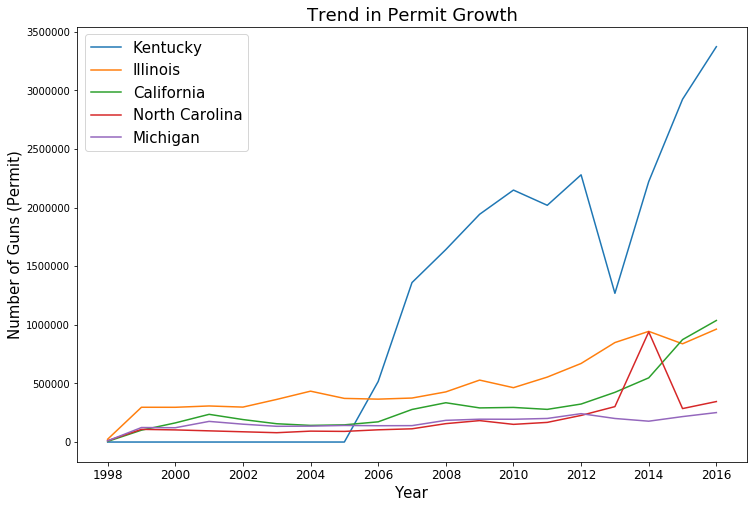

In [32]:
# plot trend of top 5 states with most permits issued from 1998 to 2016
plot_trend('permit')

* ### 2. From 1998 to 2016, the top 5 states with most gun permits issued are Kentucky, Illinois, California, North Carolina, and Michigan, with Kentucky increasing most significantly.

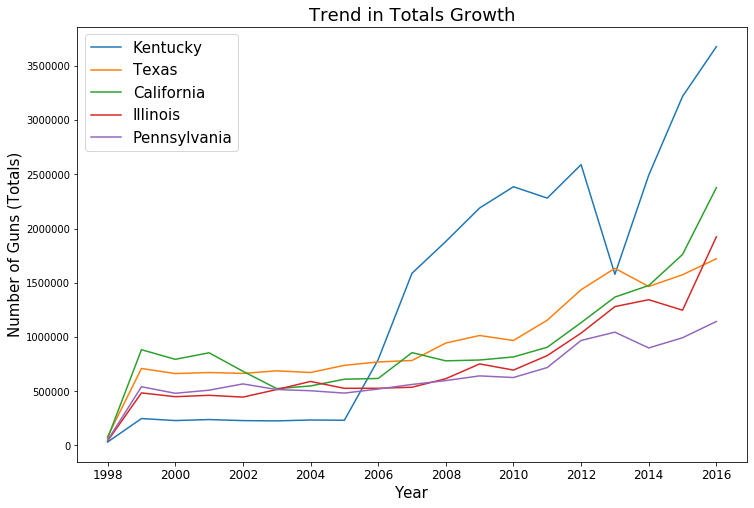

In [33]:
# plot trend of top 5 states with most permits issued & gun sale from 1998 to 2016
plot_trend('totals')

* ### 3. From 1998 to 2016, the top 5 states with most gun permits issued and most gun sale are Kentucky, Texas, California, Illinois, and Pensylvania, with Kentucky increasing most significantly.

<a id='conclusions'></a>
## Conclusions
* ### Results:    
    * #### The state that holds most permits is Kentucky, while the state that sold most guns over the years is Texas with Handgun and long gun contributing most.
    * #### According to the analysis, it is found that the willingness of purchasing guns is weakly correlated to the education level, the race, the number of immigrants, and the disability rate but strongly correlated to the number of employment in a state. The more labor force get jobs, the more guns people tend to purchase in a state.
    * #### The overall trend of gun purchase in 1998-2016 is increasing, with Kentucky increasing most significantly. The top states that have gun registered in total are Kentucky, Texas, California, Illinois, and Pensylvania.
* ### Limitations:
    * #### In the gun data, a lot of missing values were filled with zeros by assuming that no gun trading when no entry present. In reality, it is possible that agents forgot to input a value, in which case it could bring a lot uncertainty if we simply filled the missing values with zeros. Therefore, more detailed instructions/information is needed for better accuracy.
    * #### The statistical analysis was descriptive not inferential, so no hypothesis test was made.
    * #### The analysis could not provide prediction for future data which would need further machine learning studies.